<a href="https://colab.research.google.com/github/BearKS/Robotic-weed-control-system/blob/feature%2Fsegmentation/Segmentation_without_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install plantcv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from plantcv import plantcv as pcv

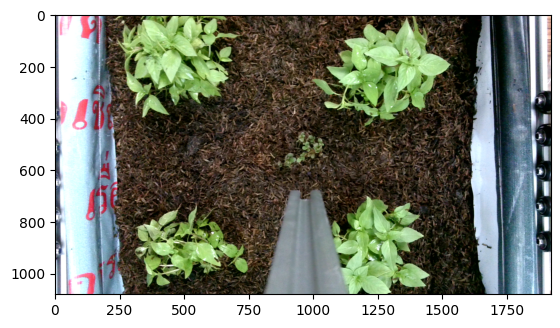

In [14]:
class options:
    def __init__(self):
        self.image = "/content/RWSIP-1-1-65-1939.png"
        self.debug = "plot"
        self.writeimg= False 
        self.outdir = "."
# Get options
args = options()

# Set debug to the global parameter 
pcv.params.debug = args.debug

# Read image

# Inputs:
#   filename - Image file to be read in 
#   mode - Return mode of image; either 'native' (default), 'rgb', 'gray', or 'csv' 

img, path, filename = pcv.readimage(filename=args.image)

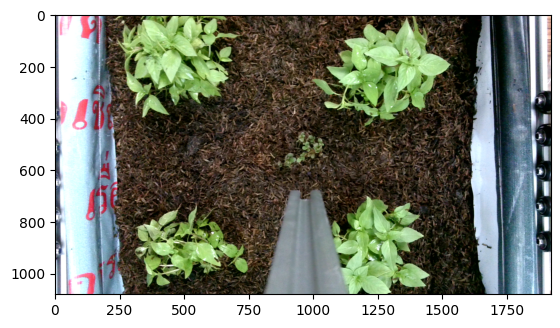

In [16]:
# Crop the image down to focus on just one plant 
# crop_img = img[525:900,2030:2400]
crop_img = img
# Print it out to see 
pcv.plot_image(crop_img)

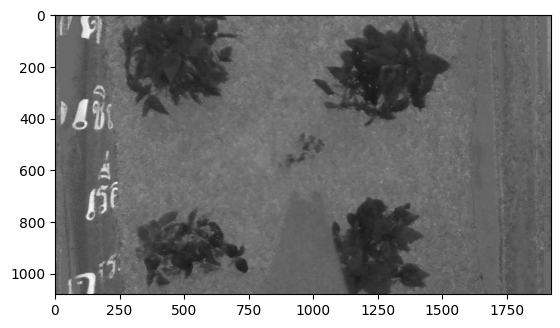

In [17]:
# Convert image from RGB color space to LAB and keep only the 
# green-magenta channel 

# Inputs:
#    rgb_img = image object, RGB color space
#    channel = color subchannel ('l' = lightness, 'a' = green-magenta , 'b' = blue-yellow)

a = pcv.rgb2gray_lab(rgb_img=crop_img, channel='a')

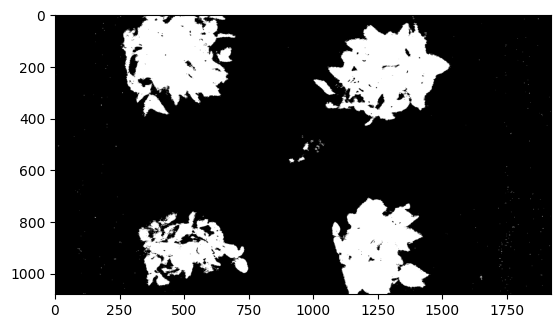

In [18]:
# Set a binary threshold on the image 

# Inputs:
#    gray_img    = img object, grayscale
#    threshold   = threshold value (0-255)
#    max_value   = value to apply above threshold (usually 255 = white)
#    object_type = light or dark
#       - If object is light then standard thresholding is done
#       - If object is dark then inverse thresholding is done

img_binary = pcv.threshold.binary(gray_img=a, threshold=110, max_value=255, object_type='dark')

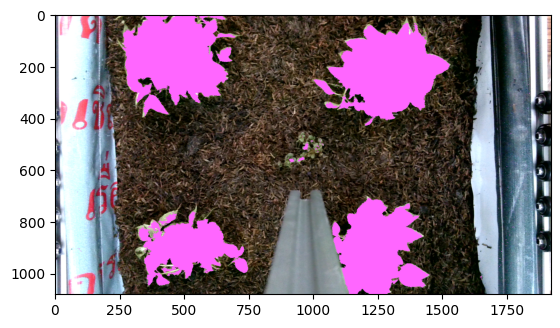

In [19]:
# Find objects

# Inputs:
#    img  = image that the objects will be overlayed
#    mask = what is used for object detection

id_objects, obj_hierarchy = pcv.find_objects(img=crop_img, mask=img_binary)

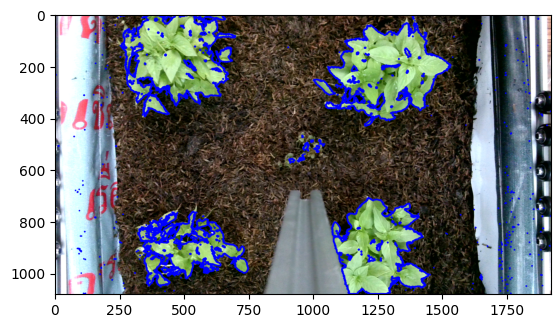

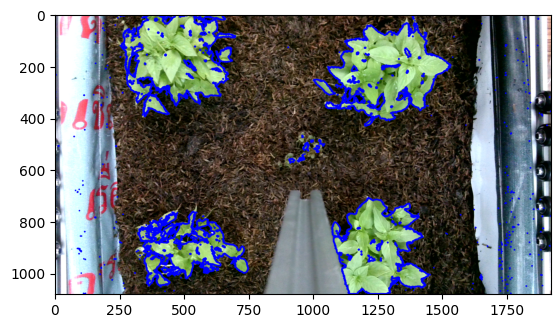

In [20]:
# Combine objects 

# Inputs:
#   img       = RGB or grayscale image data for plotting 
#   contours  = Contour list 
#   hierarchy = Contour hierarchy array 

obj, mask = pcv.object_composition(img=crop_img, contours=id_objects, hierarchy=obj_hierarchy)

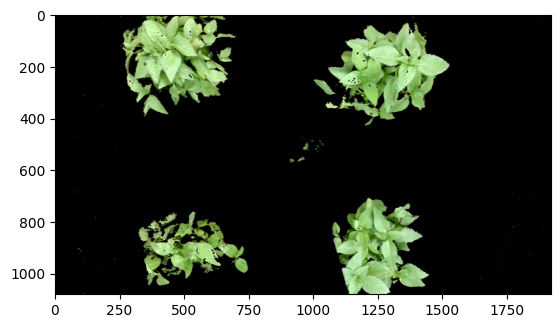

In [21]:
# Appy mask

# Inputs:
#   img        = RGB or grayscale image data 
#   mask       = Binary mask image data 
#   mask_color = 'white' or 'black' 

masked = pcv.apply_mask(img=crop_img, mask=mask, mask_color="black")

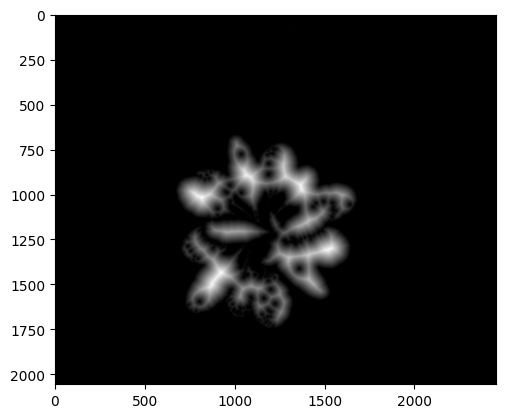

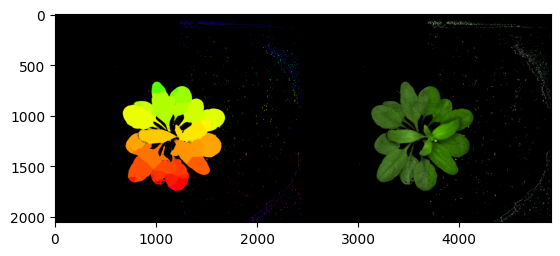

In [12]:
%%time
# Use watershed segmentation 

# Inputs:
#   rgb_img  = RGB image data 
#   mask     = Binary image, single channel, object in white and background black
#   distance = Minimum distance of local maximum, lower values are more sensitive, 
#              and segments more objects (default: 10)
#   label    = Optional label parameter, modifies the variable name of observations recorded. (default `label="default"`)filled_img = pcv.morphology.fill_segments(mask=cropped_mask, objects=edge_objects)


analysis_images = pcv.watershed_segmentation(rgb_img=masked, mask=mask, distance=15, label="default")

In [ ]:
pcv.outputs.save_results(filename='segmentation_tutorial_results.txt')